## 1. 데이터 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/test.csv')

In [4]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [5]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


변수 정보

* fixed acidity 산도

* volatile acidity 휘발성산

* citric acid 시트르산

* residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분

* chlorides 염화물

* free sulfur dioxide 독립 이산화황

* total sulfur dioxide 총 이산화황

* density 밀도

* pH 수소이온농도

* sulphates 황산염

* alcohol 도수

* type 종류



In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


* 5497개 데이터, 결측치 없음

## 2. EDA

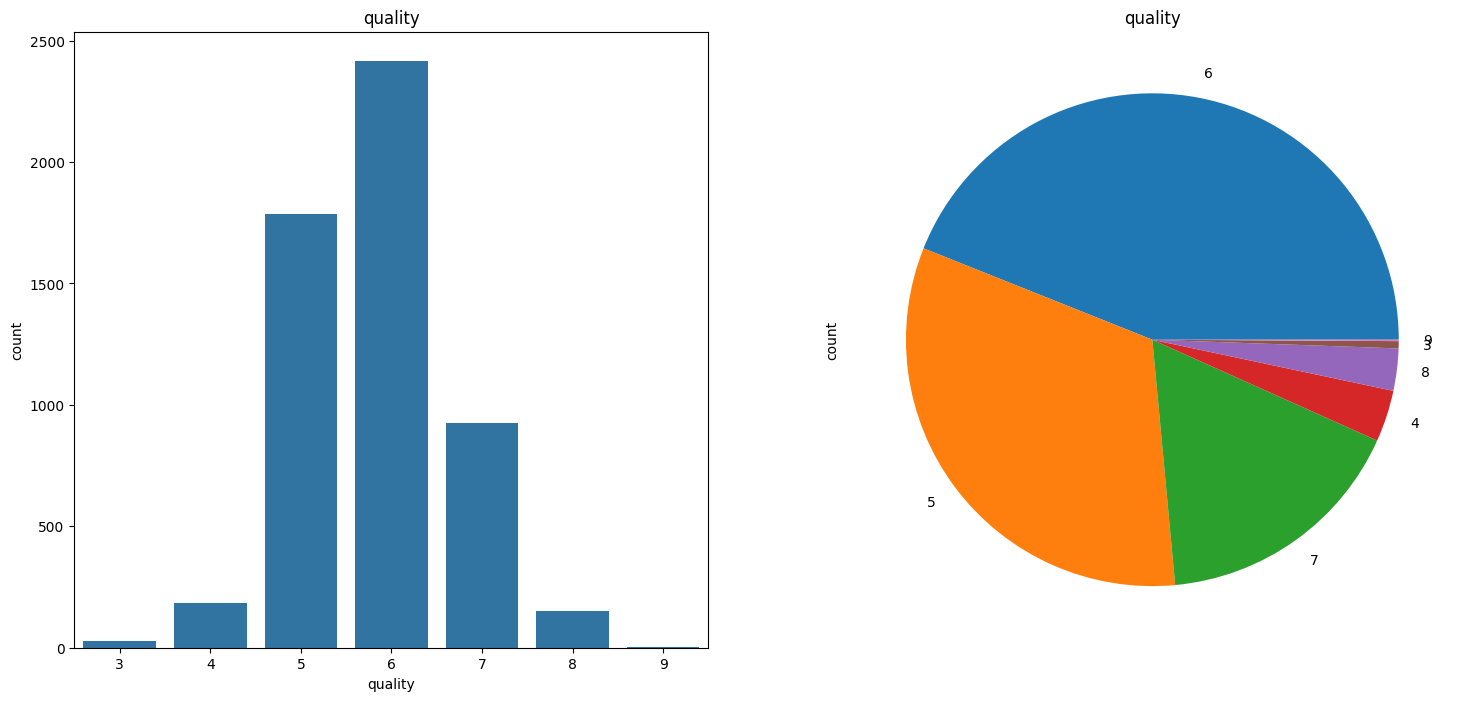

In [12]:
# 품질 분포 확인

f,ax=plt.subplots(1,2,figsize=(18,8))
train['quality'].value_counts().plot.pie(ax=ax[1])
ax[0].set_title('quality')
ax[0].set_ylabel('')
sns.countplot(x='quality',data=train,ax=ax[0])
ax[1].set_title('quality')
plt.show()

In [13]:
# 6이상은 좋은 품질(1), 미만은 안좋은 품질(2)로 이진 분류
train['quality_b'] = train['quality'].apply(lambda x: 1 if x >= 6 else 0)

In [15]:
train['quality_b'].value_counts()

,count
quality_b,
1,3497
0,2000


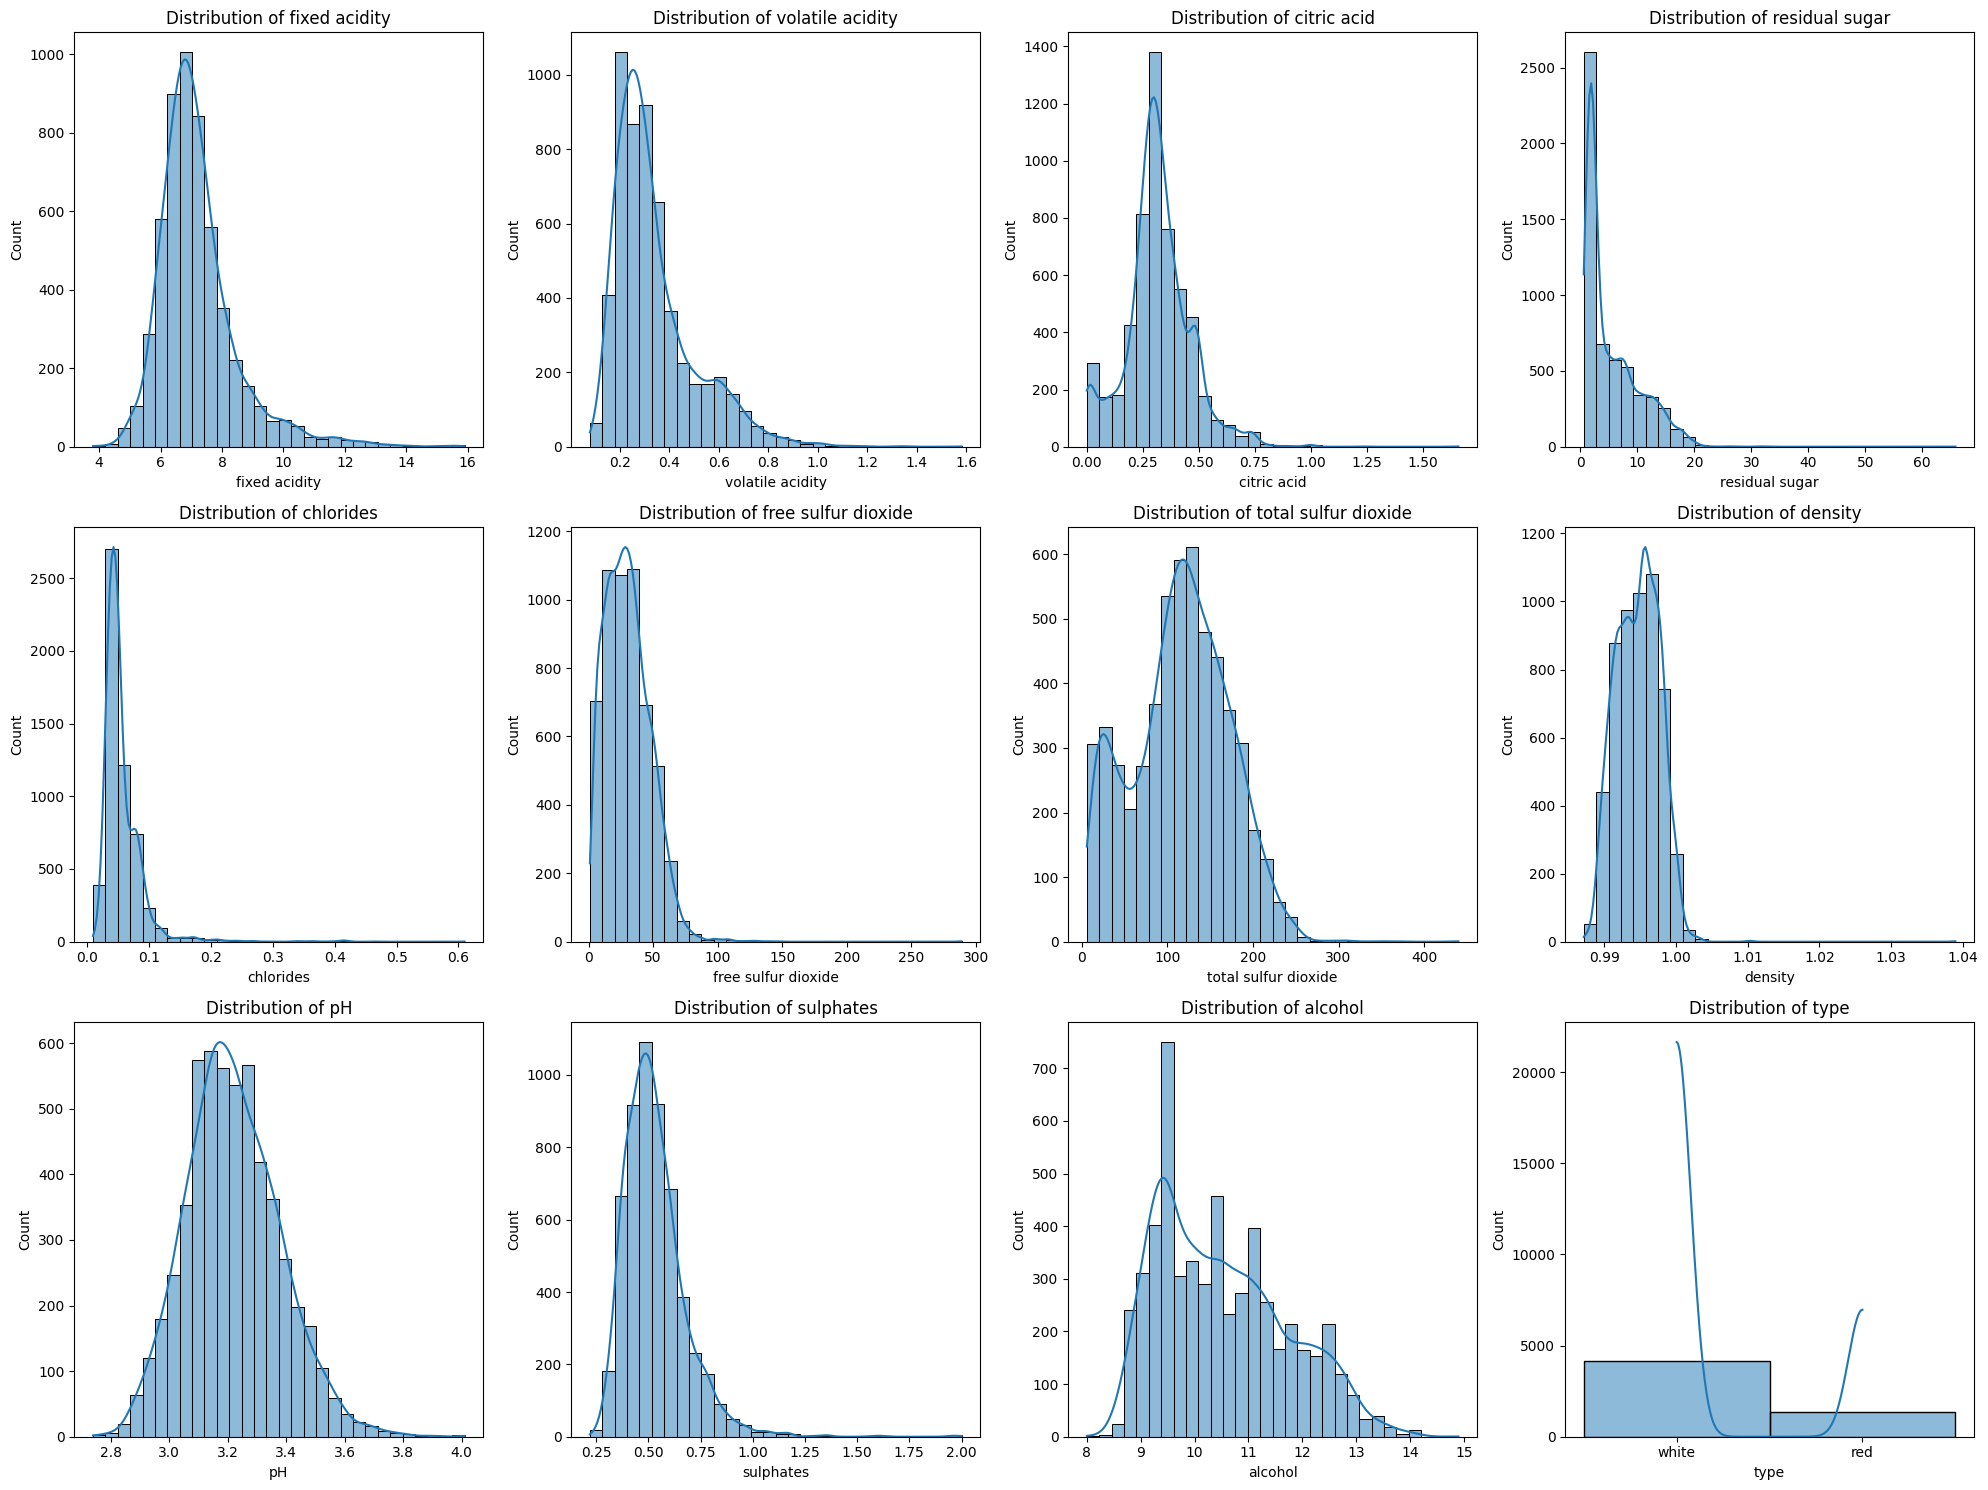

In [22]:
# 각 변수별 분포

def plot_feature_distributions(df):
    features = df.drop(['index','quality', 'quality_b'], axis=1).columns
    plt.figure(figsize=(20, 15))

    for i, col in enumerate(features):
        plt.subplot(3, 4, i + 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

plot_feature_distributions(train)

<Axes: >

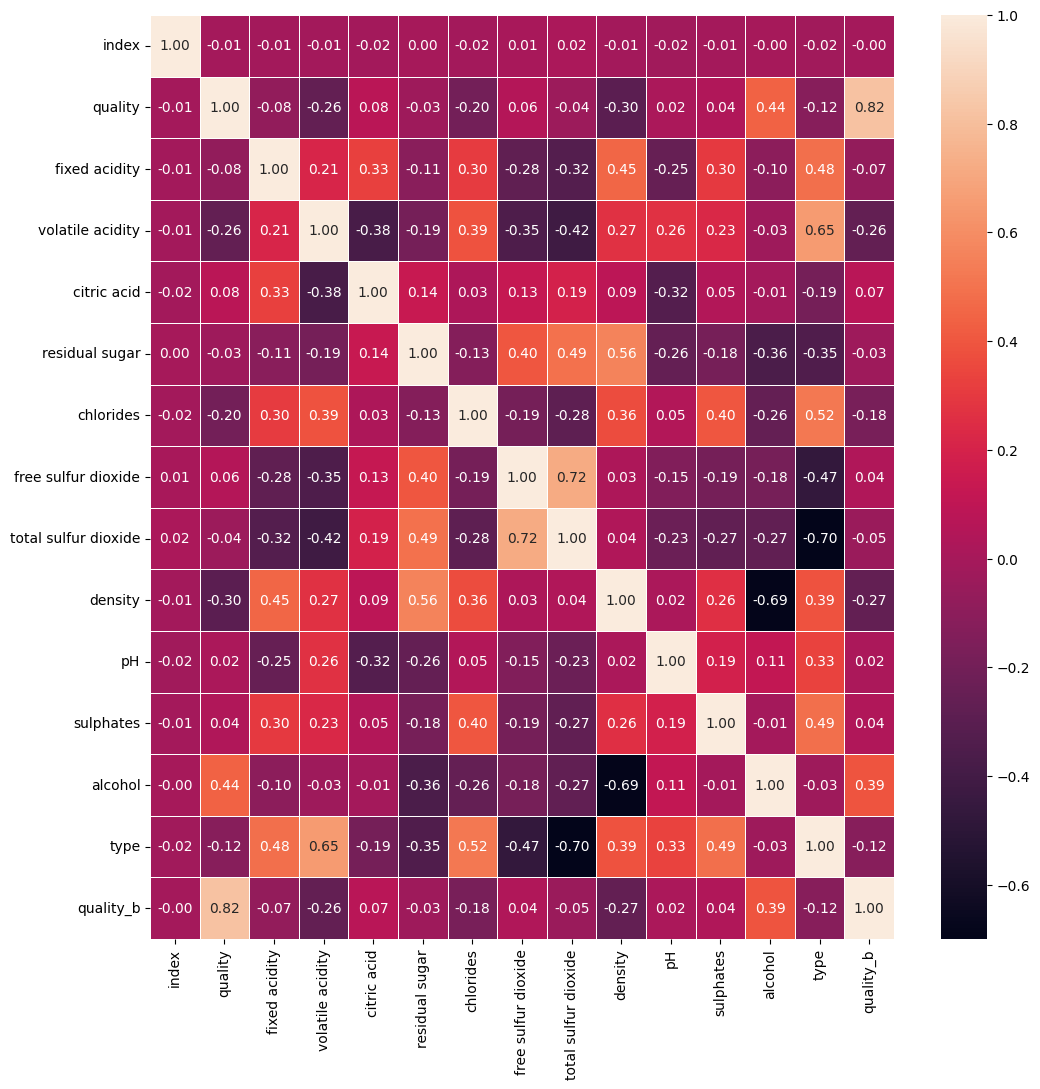

In [26]:
# 피처 간 상관관계 파악

plt.figure(figsize=(12,12))
sns.heatmap(data = train.corr(), annot=True, fmt = '.2f', linewidths=.5)

밀도와 도수 사이에 강한 음의 상관관계



* alcohol 에 따른 품질

In [35]:
train['alcohol'].describe()

,alcohol
count,5497.000000
mean,10.504918
std,1.194524
min,8.000000
25%,9.500000
50%,10.300000
75%,11.300000
max,14.900000


<ipython-input-33-2b5e8ab26596>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quality (0=Low, 1=High)')


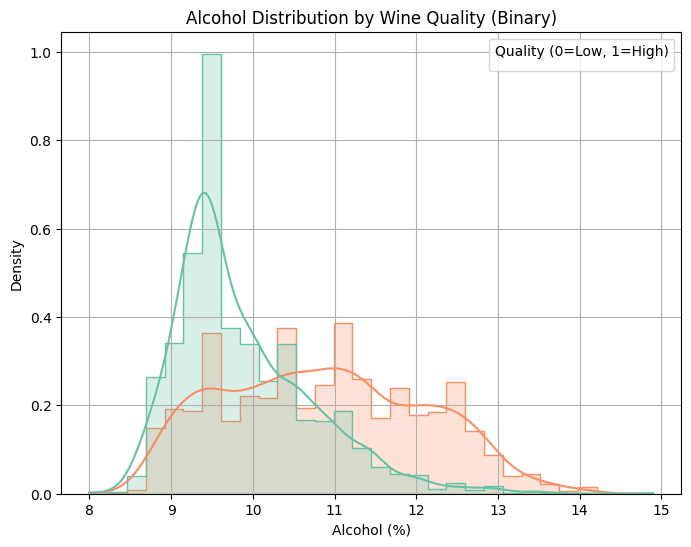

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(data=train, x='alcohol', hue='quality_b', kde=True, bins=30, palette='Set2', element='step', stat='density', common_norm=False)
plt.title('Alcohol Distribution by Wine Quality (Binary)')
plt.xlabel('Alcohol (%)')
plt.ylabel('Density')
plt.legend(title='Quality (0=Low, 1=High)')
plt.grid(True)
plt.show()

낮은 품질의 와인 도수는 9-10 사이가 많다.

높은 품질의 와인도수는 9-13도 사이에 비교적 고르게 분포되어있음

도수가 높을수록 품질이 좋을 가능성??

* density 에 따른 품질

In [27]:
train['density'].describe()

,density
count,5497.000000
mean,0.994673
std,0.003014
min,0.987110
25%,0.992300
50%,0.994800
75%,0.996930
max,1.038980


대부분이 1이하. 오른쪽으로 긴 꼬리

<ipython-input-42-30afc809858b>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quality (0=Low, 1=High)')


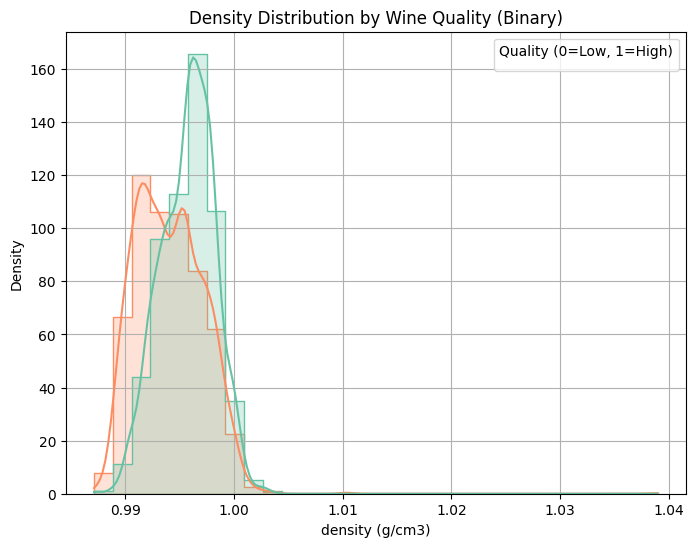

In [42]:
plt.figure(figsize=(8, 6))
sns.histplot(data=train, x='density', hue='quality_b', kde=True, bins=30, palette='Set2', element='step', stat='density', common_norm=False)
plt.title('Density Distribution by Wine Quality (Binary)')
plt.xlabel('density (g/cm3)')
plt.ylabel('Density')
plt.legend(title='Quality (0=Low, 1=High)')
plt.grid(True)
plt.show()

<ipython-input-43-b026b634b4e1>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quality (0=Low, 1=High)')


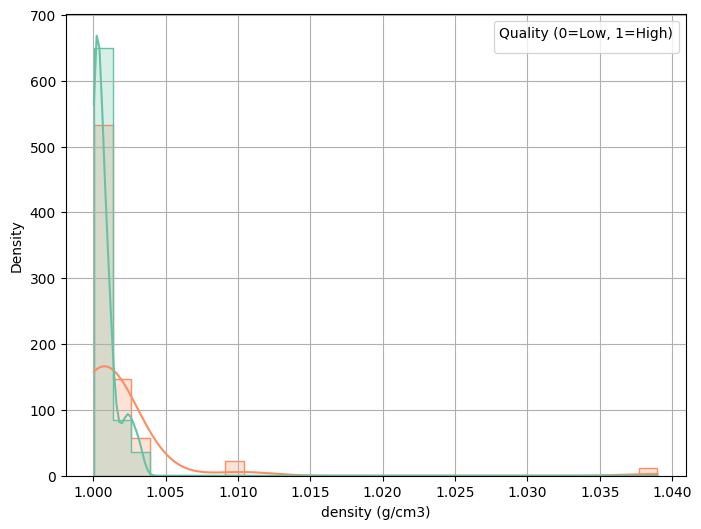

In [43]:
train_density_high=train[train['density'] > 1]

plt.figure(figsize=(8, 6))
sns.histplot(data=train_density_high, x='density', hue='quality_b', kde=True, bins=30, palette='Set2', element='step', stat='density', common_norm=False)
plt.xlabel('density (g/cm3)')
plt.ylabel('Density')
plt.legend(title='Quality (0=Low, 1=High)')
plt.grid(True)
plt.show()

peak 의 위치를 봤을 때, 비교적 밀도가 낮을수록 높은 품질

밀도가 1.005보다 큰 와인의 품질은 다 1이었음

*(발효가 잘 진행된 와인은 당이 알코올로 바뀌면서 밀도가 낮아지기 때문에, 낮은 밀도는 일반적으로 더 높은 품질을 암시할 수 있음. 무조건은 아님)*

* chlorides 에 따른 품질

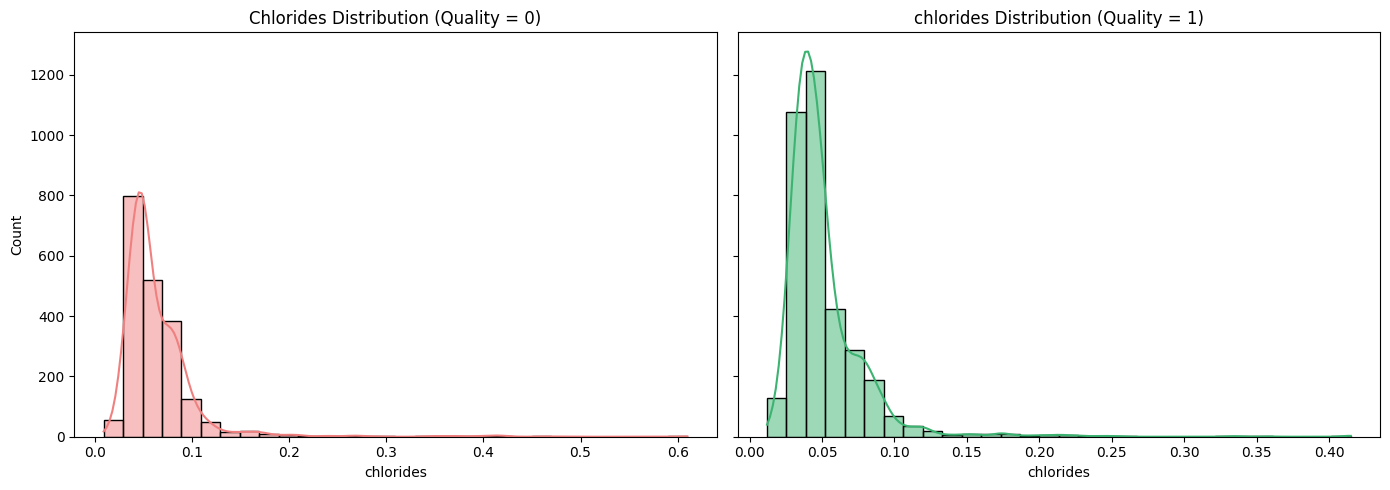

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Quality 0 (낮은 품질)
sns.histplot(train[train['quality_b'] == 0]['chlorides'], kde=True, bins=30, color='lightcoral', ax=axes[0])
axes[0].set_title('Chlorides Distribution (Quality = 0)')
axes[0].set_xlabel('chlorides')
axes[0].set_ylabel('Count')

# Quality 1 (높은 품질)
sns.histplot(train[train['quality_b'] == 1]['chlorides'], kde=True, bins=30, color='mediumseagreen', ax=axes[1])
axes[1].set_title('chlorides Distribution (Quality = 1)')
axes[1].set_xlabel('chlorides')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

* volatile acidity에 따른 품질

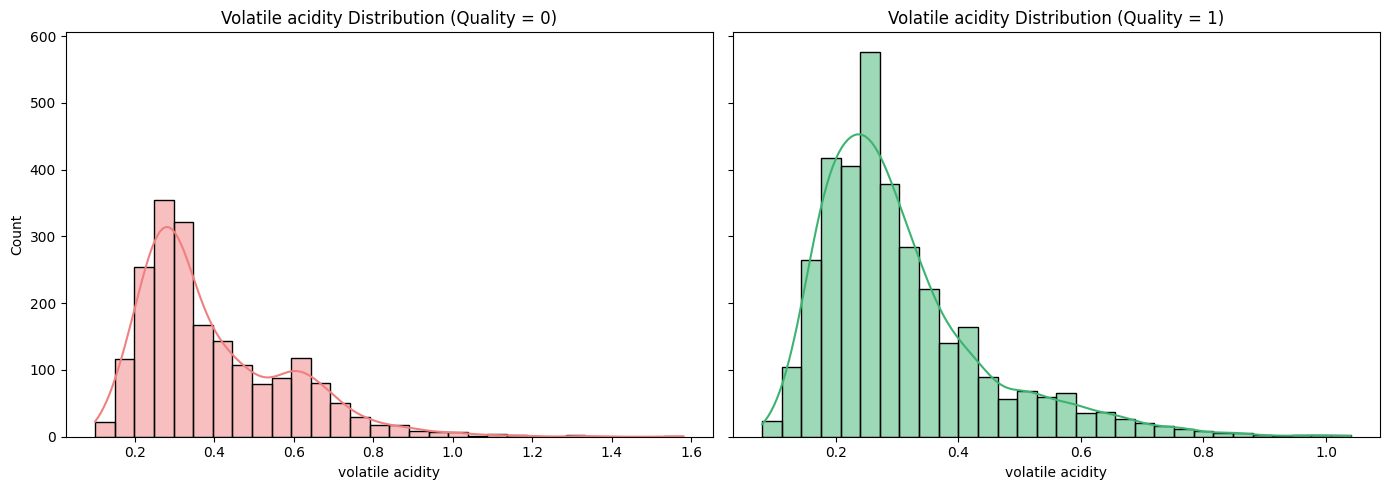

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Quality 0 (낮은 품질)
sns.histplot(train[train['quality_b'] == 0]['volatile acidity'], kde=True, bins=30, color='lightcoral', ax=axes[0])
axes[0].set_title('Volatile acidity Distribution (Quality = 0)')
axes[0].set_xlabel('volatile acidity')
axes[0].set_ylabel('Count')

# Quality 1 (높은 품질)
sns.histplot(train[train['quality_b'] == 1]['volatile acidity'], kde=True, bins=30, color='mediumseagreen', ax=axes[1])
axes[1].set_title('Volatile acidity Distribution (Quality = 1)')
axes[1].set_xlabel('volatile acidity')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

## 3. Feature Engineering and Data Cleaning

In [49]:
# type 피처 >> numeric 변환

train['type'].replace({'white': 0, 'red': 1}, inplace=True)
test['type'].replace({'white': 0, 'red': 1}, inplace=True)

<ipython-input-49-488dedb473e2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['type'].replace({'white': 0, 'red': 1}, inplace=True)
<ipython-input-49-488dedb473e2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [63]:
# 불필요한 피처 제거
train.drop(['index','quality'], axis=1, inplace=True)
test.drop(['index'], axis=1,inplace=True)

## 4. 모델링

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [66]:
X = train.drop(['quality_b'], axis=1)
y = train['quality_b']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

In [67]:
# 정규화

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
# RF

model=RandomForestClassifier()
model.fit(X_train, y_train)
prediction1=model.predict(X_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction1,y_test))

The accuracy of the Random Forests is 0.8354545454545454


In [73]:
# XGBoost

model=XGBClassifier()
model.fit(X_train, y_train)
prediction2=model.predict(X_test)
print('The accuracy of the XGBoost is',metrics.accuracy_score(prediction2,y_test))

The accuracy of the XGBoost is 0.8181818181818182


In [72]:
# LightGBM

model=LGBMClassifier()
model.fit(X_train, y_train)
prediction3=model.predict(X_test)
print('The accuracy of the LightGBM is',metrics.accuracy_score(prediction3,y_test))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2809, number of negative: 1588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1484
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.638845 -> initscore=0.570353
[LightGBM] [Info] Start training from score 0.570353
The accuracy of the LightGBM is 0.8163636363636364


In [82]:
# 결정 트리

model=DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction4=model.predict(X_test)
print('The accuracy of the DecisionTree is',metrics.accuracy_score(prediction4,y_test))

The accuracy of the DecisionTree is 0.7527272727272727


In [87]:
# RandomForests 하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8300875175779634
RandomForestClassifier(n_estimators=600)


In [91]:
# 보팅 분류기

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

ensemble_lin_rbf=VotingClassifier(estimators=[('RF',RandomForestClassifier(n_estimators=500,random_state=0)),
 ('DT',DecisionTreeClassifier(random_state=0)),('XGB',XGBClassifier()), ('LGBM',LGBMClassifier())], voting='soft').fit(X_train,y_train)

print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(X_test,y_test))
cross=cross_val_score(ensemble_lin_rbf,X,y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2809, number of negative: 1588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1484
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.638845 -> initscore=0.570353
[LightGBM] [Info] Start training from score 0.570353
The accuracy for ensembled model is: 0.8236363636363636
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3147, number of negative: 1800
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000668 seconds.
You can set `force_col_wise=true` to remove the overhead.


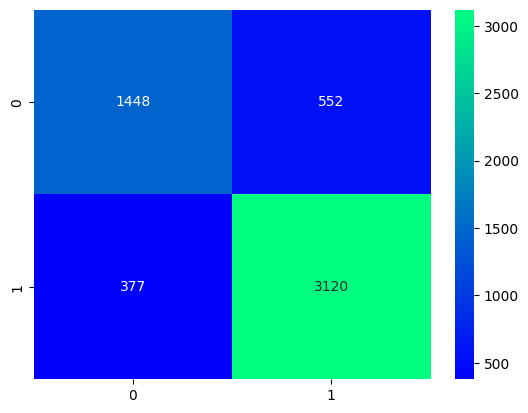

In [92]:
# 랜덤포레스트 혼동행렬

from sklearn.model_selection import cross_val_predict

RF=RandomForestClassifier()
result=cross_val_predict(RF,X,y,cv=10)
sns.heatmap(confusion_matrix(y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

* 랜덤포레스트 정확도가 제일 높게 나옴
